In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../Data_output/red_flags.csv')
tender = pd.read_csv('../Data_input/tender.csv')

## Pre-procesing

In [3]:
# Diferencia entre monto licitado y monto firmado en el contrato
# Diferencia en días entre el fin del concurso y la firma del contrato

In [4]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
df.shape

(9072, 14)

In [6]:
df.head()

,ocid,NF003,NF010,NF026,NF027,NF031,NF042,NF044,NF047,NF059,NF061,NF062,NF063,procuringEntity_name
0,ocds-5wno2w-CBS-AEP-002-2019-318345,1,0,0,0,0,0,0,1,0,0,1,0,Empresa Pública de Áridos y Asfaltos del Azuay
1,ocds-5wno2w-011-MCO-GAMB-2019-20973,1,0,0,0,0,0,0,1,0,0,0,0,GOBIERNO AUTONOMO DESCENTRALIZADO MUNICIPAL DE...
2,ocds-5wno2w-CIDAP-RECOM-004-2019-199216,1,1,0,0,0,0,0,0,0,0,1,0,Centro Interamericano de Artesanías y Artes Po...
3,ocds-5wno2w-009-RE-GADMB-2019-20973,1,1,0,0,0,0,0,1,0,0,0,0,GOBIERNO AUTONOMO DESCENTRALIZADO MUNICIPAL DE...
4,ocds-5wno2w-CBS-EPMAAM-002-2019-699688,1,0,0,0,0,1,0,1,0,0,1,0,EMPRESA PUBLICA MUNICIPAL DE AGUA POTABLE Y AL...


In [7]:
# df[['direct', 'limited', 'open', 'selective']] = pd.get_dummies(df['procurementMethod'])

In [8]:
# df.rename(columns={'procuringEntity_name': 'entity_name'}, inplace=True)

### Agrupando por organizaciones y sumando cada Red Flag

In [9]:
red_flags_names = df.iloc[:,1:-1].columns.tolist()
red_flags_names

['NF003',
 'NF010',
 'NF026',
 'NF027',
 'NF031',
 'NF042',
 'NF044',
 'NF047',
 'NF059',
 'NF061',
 'NF062',
 'NF063']

In [10]:
red_flags = df.groupby('procuringEntity_name')[red_flags_names].sum().reset_index()

In [11]:
red_flags

,procuringEntity_name,NF003,NF010,NF026,NF027,NF031,NF042,NF044,NF047,NF059,NF061,NF062,NF063
0,ACCION SOCIAL COMO ENTIDAD DE INCLUSION SOCIAL...,0,0,0,0,0,0,0,1,0,0,0,0
1,ACERIAS NACIONALES DEL ECUADOR SOCIEDAD ANONIM...,2,8,1,1,0,2,0,3,1,1,2,0
2,AGENCIA DE REGULACIÓN Y CONTROL FITO Y ZOOSANI...,0,1,0,0,0,24,0,49,0,0,0,0
3,"AGENCIA NACIONAL DE REGULACION, CONTROL Y VIGI...",0,1,0,0,0,3,0,6,0,0,0,0
4,AGENCIA NACIONAL DE REGULACIÓN Y CONTROL DEL T...,2,2,1,0,0,1,0,2,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1406,junta parroquial de cuyuja,0,1,0,0,0,0,0,1,0,0,0,0
1407,junta parroquial la tola,0,3,0,0,0,0,0,3,0,0,0,0
1408,juntaparroquialbuenavista,0,3,0,0,0,1,0,3,0,0,0,0
1409,juntaparroquialsalango,0,1,0,0,0,0,0,1,0,0,0,0


#### Total de participaciones (Casos OCIDs)

In [12]:
ocurrencias = tender.groupby('procuringEntity_name').agg({'ocid':'count'}).reset_index()
ocurrencias.rename(columns={'ocid':'Ocurrencias'}, inplace=True)

In [13]:
ocurrencias

,procuringEntity_name,Ocurrencias
0,ACCION SOCIAL COMO ENTIDAD DE INCLUSION SOCIAL...,1
1,ACCION SOCIAL DEL GOBIERNO AUTONOMO DESCENTRAL...,1
2,ACERIAS NACIONALES DEL ECUADOR SOCIEDAD ANONIM...,9
3,AGENCIA DE REGULACIÓN Y CONTROL FITO Y ZOOSANI...,109
4,"AGENCIA NACIONAL DE REGULACION, CONTROL Y VIGI...",11
...,...,...
1473,junta parroquial de cuyuja,1
1474,junta parroquial la tola,3
1475,juntaparroquialbuenavista,3
1476,juntaparroquialsalango,1


#### Juntando ambos DataFrames

In [14]:
data = red_flags.merge(ocurrencias, how='left', on='procuringEntity_name')

In [15]:
data

,procuringEntity_name,NF003,NF010,NF026,NF027,NF031,NF042,NF044,NF047,NF059,NF061,NF062,NF063,Ocurrencias
0,ACCION SOCIAL COMO ENTIDAD DE INCLUSION SOCIAL...,0,0,0,0,0,0,0,1,0,0,0,0,1
1,ACERIAS NACIONALES DEL ECUADOR SOCIEDAD ANONIM...,2,8,1,1,0,2,0,3,1,1,2,0,9
2,AGENCIA DE REGULACIÓN Y CONTROL FITO Y ZOOSANI...,0,1,0,0,0,24,0,49,0,0,0,0,109
3,"AGENCIA NACIONAL DE REGULACION, CONTROL Y VIGI...",0,1,0,0,0,3,0,6,0,0,0,0,11
4,AGENCIA NACIONAL DE REGULACIÓN Y CONTROL DEL T...,2,2,1,0,0,1,0,2,0,0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1406,junta parroquial de cuyuja,0,1,0,0,0,0,0,1,0,0,0,0,1
1407,junta parroquial la tola,0,3,0,0,0,0,0,3,0,0,0,0,3
1408,juntaparroquialbuenavista,0,3,0,0,0,1,0,3,0,0,0,0,3
1409,juntaparroquialsalango,0,1,0,0,0,0,0,1,0,0,0,0,1


## Creación y análisis de nuevos grupos de Red Flags

In [16]:
red_flags_names

['NF003',
 'NF010',
 'NF026',
 'NF027',
 'NF031',
 'NF042',
 'NF044',
 'NF047',
 'NF059',
 'NF061',
 'NF062',
 'NF063']

Salidas de cada Red Flag
#### - NF003
    - Datos de fechas, duraciones en días
#### - NF010
    - Cantidades de dinero, valores de bienes
#### - NF011
    - Dinero
#### - NF025
    - Ocurrencias de éxito de entidades
#### - NF026
    - Formación de grupos por Id de entidades participantes y ganadoras
#### - NF027
    - Regiones, mayores ofertas por ubicaciones
#### - NF031
    - Dinero, pagos, presupuesto
#### - NF042, NF044, NF047
    - Falta de información personal para las ofertas
#### - NF059
    - Dinero
#### - NF061, 62, 63
    - Tiempo, tiempo, tiempo

## Categorías
- Dinero
    - NF010
    - NF031
    - NF059
    - NF011
    - 16
- Tiempo
    - NF003
    - NF061
    - NF062
    - NF063
- Irregularidades de información
    - NF042
    - NF044
    - NF047
- Éxitos y participaciones (Organizaciones)
    - 18
    - 19
    - NF026
    - NF027

## Nuevas categorías unidas

In [17]:
dinero = ['NF010','NF031','NF059']
tiempo = ['NF003','NF061','NF062','NF063']
informacion = ['NF042','NF044','NF047']
frecuencias = ['NF026','NF027']

In [18]:
total_ocurr = data['Ocurrencias']
money = data[dinero].sum(axis=1) / total_ocurr
time = data[tiempo].sum(axis=1) / total_ocurr
information = data[informacion].sum(axis=1) / total_ocurr
frequencies = data[frecuencias].sum(axis=1) / total_ocurr

In [19]:
data_reduce = pd.concat([data,money,time,information,frequencies], axis=1)
data_reduce = pd.concat([data_reduce.iloc[:,0],data_reduce.iloc[:,-4:]], axis=1)
data_reduce.columns = ['entidades','money','time','information','frequencies']

In [20]:
data_reduce

,entidades,money,time,information,frequencies
0,ACCION SOCIAL COMO ENTIDAD DE INCLUSION SOCIAL...,0.000000,0.000000,1.000000,0.000000
1,ACERIAS NACIONALES DEL ECUADOR SOCIEDAD ANONIM...,1.000000,0.555556,0.555556,0.222222
2,AGENCIA DE REGULACIÓN Y CONTROL FITO Y ZOOSANI...,0.009174,0.000000,0.669725,0.000000
3,"AGENCIA NACIONAL DE REGULACION, CONTROL Y VIGI...",0.090909,0.000000,0.818182,0.000000
4,AGENCIA NACIONAL DE REGULACIÓN Y CONTROL DEL T...,1.000000,2.000000,1.500000,0.500000
...,...,...,...,...,...
1406,junta parroquial de cuyuja,1.000000,0.000000,1.000000,0.000000
1407,junta parroquial la tola,1.000000,0.000000,1.000000,0.000000
1408,juntaparroquialbuenavista,1.000000,0.000000,1.333333,0.000000
1409,juntaparroquialsalango,1.000000,0.000000,1.000000,0.000000


## Método de codo

In [21]:
data_reduce.corr()

,money,time,information,frequencies
money,1.000000,0.070786,0.234364,0.050657
time,0.070786,1.000000,0.121895,0.531164
information,0.234364,0.121895,1.000000,0.136935
frequencies,0.050657,0.531164,0.136935,1.000000


In [22]:
X = data_reduce.iloc[:,1:]

In [23]:
sc = StandardScaler()
sc.fit(X)

StandardScaler()

In [24]:
X_norm = sc.transform(X)

In [25]:
clusters = np.arange(2,11)

In [26]:
inercias = []
for k in clusters:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_norm)
    inercias.append(kmeans.inertia_)

In [27]:
eva = pd.DataFrame({"K": clusters, "inercia": inercias})

In [28]:
eva

,K,inercia
0,2,4025.656566
1,3,2657.406344
2,4,2051.787003
3,5,1494.752323
4,6,1278.526731
5,7,1067.007794
6,8,884.085597
7,9,776.511441
8,10,716.867088


<AxesSubplot:xlabel='K', ylabel='inercia'>

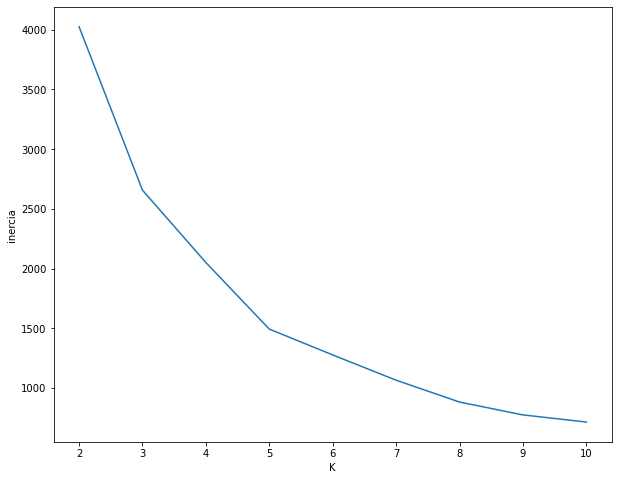

In [29]:
fig, ax = plt.subplots(figsize=(10,8))
sns.lineplot(data = eva, x = "K", y = "inercia")

## Clustering

In [30]:
kmeans2 = KMeans(n_clusters=5, random_state=0)

In [31]:
kmeans2.fit(X_norm)

KMeans(n_clusters=5, random_state=0)

In [32]:
kmeans2.cluster_centers_

array([[ 1.1721585 , -0.23643985,  0.49752532, -0.14481567],
       [-0.79957375, -0.19764689,  0.34233443, -0.09701615],
       [ 0.45426502,  4.03446328,  1.05424567,  6.7175616 ],
       [ 0.25935426,  3.53709543,  0.44353298,  0.3373721 ],
       [-0.56234009, -0.22249799, -1.4211835 , -0.14098237]])

In [33]:
data_reduce2=data_reduce.copy()

In [34]:
data_reduce2['cluster'] = kmeans2.labels_

In [35]:
data_reduce2.head()

,entidades,money,time,information,frequencies,cluster
0,ACCION SOCIAL COMO ENTIDAD DE INCLUSION SOCIAL...,0.000000,0.000000,1.000000,0.000000,1
1,ACERIAS NACIONALES DEL ECUADOR SOCIEDAD ANONIM...,1.000000,0.555556,0.555556,0.222222,0
2,AGENCIA DE REGULACIÓN Y CONTROL FITO Y ZOOSANI...,0.009174,0.000000,0.669725,0.000000,1
3,"AGENCIA NACIONAL DE REGULACION, CONTROL Y VIGI...",0.090909,0.000000,0.818182,0.000000,1
4,AGENCIA NACIONAL DE REGULACIÓN Y CONTROL DEL T...,1.000000,2.000000,1.500000,0.500000,2


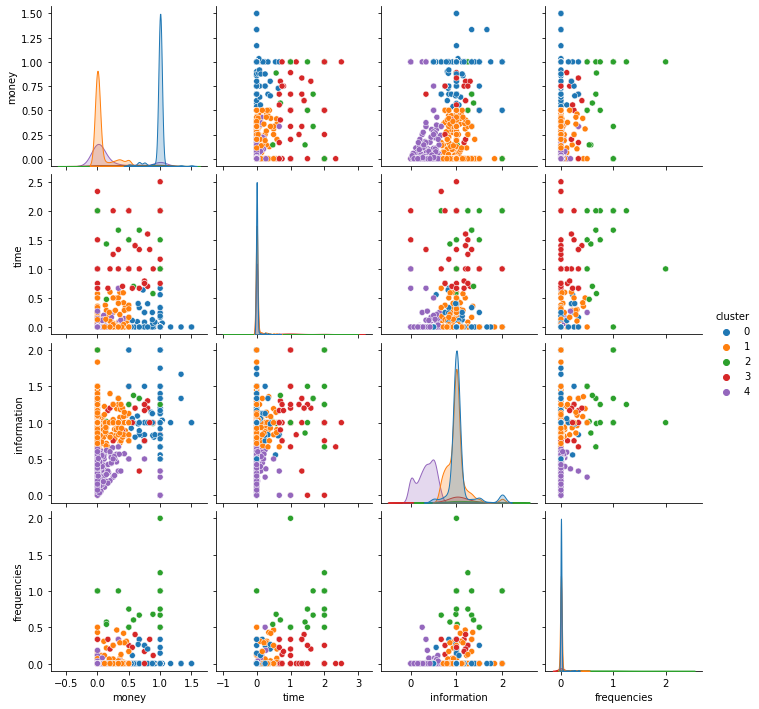

In [36]:
sns.pairplot(data_reduce2,hue="cluster", palette="tab10")

<AxesSubplot:xlabel='cluster', ylabel='money'>

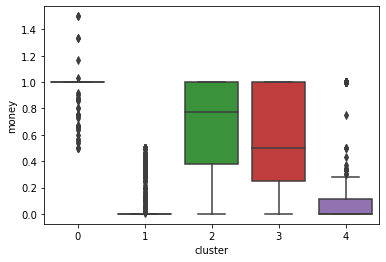

In [37]:
sns.boxplot(x='cluster', y='money', data=data_reduce2)

<AxesSubplot:xlabel='cluster', ylabel='time'>

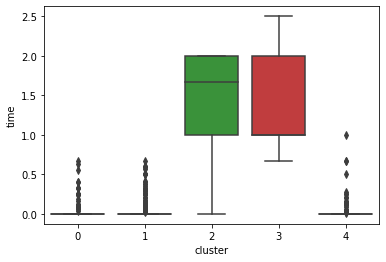

In [38]:
sns.boxplot(x='cluster', y='time', data=data_reduce2)

<AxesSubplot:xlabel='cluster', ylabel='information'>

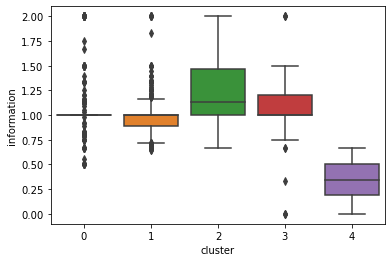

In [39]:
sns.boxplot(x='cluster', y='information', data=data_reduce2)

<AxesSubplot:xlabel='cluster', ylabel='frequencies'>

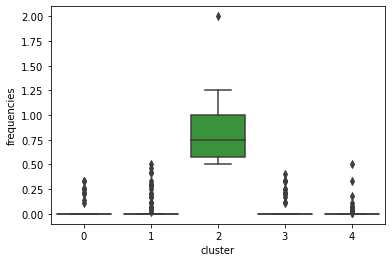

In [40]:
sns.boxplot(x='cluster', y='frequencies', data=data_reduce2)

In [41]:
data_reduce2

,entidades,money,time,information,frequencies,cluster
0,ACCION SOCIAL COMO ENTIDAD DE INCLUSION SOCIAL...,0.000000,0.000000,1.000000,0.000000,1
1,ACERIAS NACIONALES DEL ECUADOR SOCIEDAD ANONIM...,1.000000,0.555556,0.555556,0.222222,0
2,AGENCIA DE REGULACIÓN Y CONTROL FITO Y ZOOSANI...,0.009174,0.000000,0.669725,0.000000,1
3,"AGENCIA NACIONAL DE REGULACION, CONTROL Y VIGI...",0.090909,0.000000,0.818182,0.000000,1
4,AGENCIA NACIONAL DE REGULACIÓN Y CONTROL DEL T...,1.000000,2.000000,1.500000,0.500000,2
...,...,...,...,...,...,...
1406,junta parroquial de cuyuja,1.000000,0.000000,1.000000,0.000000,0
1407,junta parroquial la tola,1.000000,0.000000,1.000000,0.000000,0
1408,juntaparroquialbuenavista,1.000000,0.000000,1.333333,0.000000,0
1409,juntaparroquialsalango,1.000000,0.000000,1.000000,0.000000,0


In [42]:
sectores=pd.read_csv('../Data_input/sectores.csv')

In [43]:
sectores

,DESCRIPCION SECTOR,NOMBRE ENTIDAD
0,ADMINISTRACION DEL ESTADO,ASAMBLEA NACIONAL
1,ADMINISTRACION DEL ESTADO,PARLAMENTO ANDINO (OFICINA NACIONAL)
2,ADMINISTRACION DEL ESTADO,DIRECCION PROVINCIAL DEL CONSEJO DE LA JUDICAT...
3,ADMINISTRACION DEL ESTADO,DIRECCION PROVINCIAL DEL CONSEJO DE LA JUDICAT...
4,ADMINISTRACION DEL ESTADO,DIRECCION PROVINCIAL DEL CONSEJO DE LA JUDICAT...
...,...,...
3092,SOCIEDADES ANONIMAS CON PARTICIPACION PUBLICAS,EMPRESA ELECTRICA RIOBAMBA
3093,SOCIEDADES ANONIMAS CON PARTICIPACION PUBLICAS,EMPRESA ELECTRICA REGIONAL NORTE S A
3094,SOCIEDADES ANONIMAS CON PARTICIPACION PUBLICAS,REFINERIA DEL PACIFICO ELOY ALFARO RDP COMPANI...
3095,SOCIEDADES ANONIMAS CON PARTICIPACION PUBLICAS,SERVICIOS TECNICOS ESPECIALIZADOS EN ELECTRICI...


In [44]:
sectores.drop_duplicates(subset=["NOMBRE ENTIDAD"], inplace=True)

In [45]:
data_final = data_reduce2.merge(sectores, how="left", left_on="entidades", right_on="NOMBRE ENTIDAD")
data_final=data_final.iloc[:,:-1]

In [46]:
data_final

,entidades,money,time,information,frequencies,cluster,DESCRIPCION SECTOR
0,ACCION SOCIAL COMO ENTIDAD DE INCLUSION SOCIAL...,0.000000,0.000000,1.000000,0.000000,1,GOBIERNOS AUTONOMOS DESCENTRALIZADOS MUNICIPALES
1,ACERIAS NACIONALES DEL ECUADOR SOCIEDAD ANONIM...,1.000000,0.555556,0.555556,0.222222,0,NaN
2,AGENCIA DE REGULACIÓN Y CONTROL FITO Y ZOOSANI...,0.009174,0.000000,0.669725,0.000000,1,NaN
3,"AGENCIA NACIONAL DE REGULACION, CONTROL Y VIGI...",0.090909,0.000000,0.818182,0.000000,1,NaN
4,AGENCIA NACIONAL DE REGULACIÓN Y CONTROL DEL T...,1.000000,2.000000,1.500000,0.500000,2,NaN
...,...,...,...,...,...,...,...
1406,junta parroquial de cuyuja,1.000000,0.000000,1.000000,0.000000,0,NaN
1407,junta parroquial la tola,1.000000,0.000000,1.000000,0.000000,0,NaN
1408,juntaparroquialbuenavista,1.000000,0.000000,1.333333,0.000000,0,NaN
1409,juntaparroquialsalango,1.000000,0.000000,1.000000,0.000000,0,NaN


In [47]:
cluster0=data_final.loc[data_final["cluster"]==0]
cluster0

,entidades,money,time,information,frequencies,cluster,DESCRIPCION SECTOR
1,ACERIAS NACIONALES DEL ECUADOR SOCIEDAD ANONIM...,1.0,0.555556,0.555556,0.222222,0,NaN
10,"ASOCIACIÓN DE PRODUCCIÓN PESQUERA DE BUNCHE ""A...",1.0,0.000000,1.000000,0.000000,0,NaN
13,AUTORIDAD AEROPORTUARIA DE GUAYAQUIL FUNDACION...,1.0,0.000000,0.833333,0.000000,0,NaN
15,AUTORIDAD PORTUARIA DE MANTA,1.0,0.000000,1.000000,0.000000,0,ADMINISTRACION DEL ESTADO
18,Asocacion de Juntas Parroquial Galapagos,1.0,0.000000,1.000000,0.000000,0,NaN
...,...,...,...,...,...,...,...
1406,junta parroquial de cuyuja,1.0,0.000000,1.000000,0.000000,0,NaN
1407,junta parroquial la tola,1.0,0.000000,1.000000,0.000000,0,NaN
1408,juntaparroquialbuenavista,1.0,0.000000,1.333333,0.000000,0,NaN
1409,juntaparroquialsalango,1.0,0.000000,1.000000,0.000000,0,NaN


In [48]:
analisis_c0=cluster0["DESCRIPCION SECTOR"].value_counts().reset_index()
analisis_c0.columns=["DESCRIPCION SECTOR","Cantidad de casos"]
analisis_c0["Cantidad de casos"]=(analisis_c0["Cantidad de casos"]/analisis_c0["Cantidad de casos"].sum())*100
analisis_c0

,DESCRIPCION SECTOR,Cantidad de casos
0,GOBIERNOS AUTONOMOS DESCENTRALIZADOS PARROQUIALES,68.518519
1,GOBIERNOS AUTONOMOS DESCENTRALIZADOS MUNICIPALES,15.432099
2,EMPRESAS PUBLICAS DE LOS GOBIERNOS AUTONOMOS D...,4.938272
3,ADMINISTRACION DEL ESTADO,3.703704
4,GOBIERNOS AUTONOMOS DESCENTRALIZADOS PROVINCIALES,3.703704
5,EMPRESAS PUBLICAS DE LA FUNCION EJECUTIVA,1.851852
6,ENTIDADES DE EDUCACION SUPERIOR,1.851852


In [49]:
cluster1=data_final.loc[data_final["cluster"]==1]
cluster1

,entidades,money,time,information,frequencies,cluster,DESCRIPCION SECTOR
0,ACCION SOCIAL COMO ENTIDAD DE INCLUSION SOCIAL...,0.000000,0.000000,1.000000,0.000000,1,GOBIERNOS AUTONOMOS DESCENTRALIZADOS MUNICIPALES
2,AGENCIA DE REGULACIÓN Y CONTROL FITO Y ZOOSANI...,0.009174,0.000000,0.669725,0.000000,1,NaN
3,"AGENCIA NACIONAL DE REGULACION, CONTROL Y VIGI...",0.090909,0.000000,0.818182,0.000000,1,NaN
5,AGRUPAMIENTO DE COMUNICACIONES Y GUERRA ELECTR...,0.000000,0.000000,1.000000,0.000000,1,NaN
6,ARCONEL - AGENCIA DE REGULACIÓN Y CONTROL DE E...,0.000000,0.000000,1.000000,0.000000,1,NaN
...,...,...,...,...,...,...,...
1395,Universidad Estatal del Sur de Manabí,0.200000,0.000000,0.800000,0.000000,1,NaN
1396,Universidad Nacional de Chimborazo,0.000000,0.000000,0.791667,0.000000,1,NaN
1398,Universidad Técnica de Manabí,0.000000,0.000000,2.000000,0.000000,1,NaN
1400,casa de la cultura benjamin carrion nucleo de ...,0.000000,0.000000,1.000000,0.000000,1,NaN


In [50]:
analisis_c1=cluster1["DESCRIPCION SECTOR"].value_counts().reset_index()
analisis_c1.columns=["DESCRIPCION SECTOR","Cantidad de casos"]
analisis_c1["Cantidad de casos"]=(analisis_c1["Cantidad de casos"]/analisis_c1["Cantidad de casos"].sum())*100
analisis_c1

,DESCRIPCION SECTOR,Cantidad de casos
0,ADMINISTRACION DEL ESTADO,33.834586
1,GOBIERNOS AUTONOMOS DESCENTRALIZADOS MUNICIPALES,24.060150
2,ENTIDADES DE SEGURIDAD SOCIAL,15.037594
3,GOBIERNOS AUTONOMOS DESCENTRALIZADOS PARROQUIALES,11.278195
4,EMPRESAS PUBLICAS DE LOS GOBIERNOS AUTONOMOS D...,7.518797
5,ENTIDADES DE EDUCACION SUPERIOR,3.759398
6,GOBIERNOS AUTONOMOS DESCENTRALIZADOS PROVINCIALES,3.007519
7,EMPRESAS PUBLICAS DE LA FUNCION EJECUTIVA,0.751880
8,SOCIEDADES ANONIMAS CON PARTICIPACION PUBLICAS,0.751880


In [51]:
cluster2=data_final.loc[data_final["cluster"]==2]
cluster2

,entidades,money,time,information,frequencies,cluster,DESCRIPCION SECTOR
4,AGENCIA NACIONAL DE REGULACIÓN Y CONTROL DEL T...,1.000000,2.000000,1.500000,0.500000,2,NaN
7,ASAMBLEA NACIONAL,0.500000,1.000000,1.500000,0.500000,2,ADMINISTRACION DEL ESTADO
122,"CONSEJO NACIONAL ELECTORAL,DELEGACIÓN PROVINCI...",0.000000,0.000000,2.000000,1.000000,2,NaN
212,Cuartel del Grupo de Transito Norte,0.333333,1.666667,1.333333,1.000000,2,NaN
374,DIRECCION NACIONAL DE ANTINARCOTICOS,0.142857,1.428571,0.857143,0.571429,2,NaN
375,DIRECCION NACIONAL DE LA POLICIA JUDICIAL,0.500000,1.500000,1.500000,0.500000,2,ADMINISTRACION DEL ESTADO
396,DIRECCIÓN GENERAL DE INTELIGENCIA DE LA POLICI...,0.500000,2.000000,1.250000,0.750000,2,NaN
423,EMPRESA ELECTRICA REGIONAL CENTROSUR C.A.,0.885057,0.574713,0.988506,0.678161,2,NaN
428,EMPRESA ELÉCTRICA QUITO S.A. E.E.Q.,0.142857,0.476190,1.015873,0.539683,2,NaN
452,EMPRESA PUBLICA FLOTA PETROLERA ECUATORIANA -E...,1.000000,1.000000,1.000000,0.500000,2,NaN


In [52]:
analisis_c2=cluster2["DESCRIPCION SECTOR"].value_counts().reset_index()
analisis_c2.columns=["DESCRIPCION SECTOR","Cantidad de casos"]
analisis_c2["Cantidad de casos"]=(analisis_c2["Cantidad de casos"]/analisis_c2["Cantidad de casos"].sum())*100
analisis_c2

,DESCRIPCION SECTOR,Cantidad de casos
0,ADMINISTRACION DEL ESTADO,100.0


In [53]:
cluster3=data_final.loc[data_final["cluster"]==3]
cluster3

,entidades,money,time,information,frequencies,cluster,DESCRIPCION SECTOR
91,COMANDO PROVINCIAL DE POLICIA PASTAZA No. 16,1.000000,2.000000,1.000000,0.000000,3,NaN
92,COMANDO PROVINCIAL DE POLICIA PICHINCHA NRO1,0.800000,1.600000,1.200000,0.200000,3,NaN
94,COMANDO SUBZONAL DE POLICIA IMBABURA N 10,0.000000,0.750000,0.750000,0.125000,3,NaN
95,COMISION DE TRÁNSITO DEL ECUADOR,0.666667,1.000000,0.666667,0.333333,3,NaN
96,COMPAÑIA DE CONSTRUCCIONES ECUATORIANO COREANA...,1.000000,2.000000,1.000000,0.000000,3,NaN
115,CONSEJO DE GOBIERNO DEL REGIMEN ESPECIAL DE GA...,0.500000,1.500000,1.250000,0.250000,3,ADMINISTRACION DEL ESTADO
186,CUERPO DE BOMBEROS DEL CANTÓN OTAVALO,1.000000,1.000000,0.000000,0.000000,3,NaN
191,CUERPO DE BOMBEROS SANTIAGO DE PILLARO,0.000000,1.000000,2.000000,0.000000,3,GOBIERNOS AUTONOMOS DESCENTRALIZADOS MUNICIPALES
195,Centro Interamericano de Artesanías y Artes Po...,1.000000,1.166667,0.833333,0.000000,3,NaN
198,Comando Cantonal de Policía Manta,0.333333,1.333333,1.333333,0.333333,3,NaN


In [54]:
analisis_c3=cluster3["DESCRIPCION SECTOR"].value_counts().reset_index()
analisis_c3.columns=["DESCRIPCION SECTOR","Cantidad de casos"]
analisis_c3["Cantidad de casos"]=(analisis_c3["Cantidad de casos"]/analisis_c3["Cantidad de casos"].sum())*100
analisis_c3

,DESCRIPCION SECTOR,Cantidad de casos
0,GOBIERNOS AUTONOMOS DESCENTRALIZADOS MUNICIPALES,63.636364
1,ADMINISTRACION DEL ESTADO,18.181818
2,EMPRESAS PUBLICAS DE LOS GOBIERNOS AUTONOMOS D...,9.090909
3,GOBIERNOS AUTONOMOS DESCENTRALIZADOS PROVINCIALES,9.090909


In [55]:
cluster4=data_final.loc[data_final["cluster"]==4]
cluster4

,entidades,money,time,information,frequencies,cluster,DESCRIPCION SECTOR
11,ASOCIACIÓN DE PRODUCTORES DE SEMILLAS Y ALIMEN...,1.000000,0.000000,0.000000,0.000000,4,NaN
12,ASTILLEROS NAVALES ECUATORIANOS - ASTINAVE EP -,0.100000,0.000000,0.500000,0.000000,4,NaN
22,BANECUADOR B.P.,0.060606,0.020202,0.383838,0.010101,4,NaN
24,BASE NAVAL DE ESMERALDAS,0.000000,0.000000,0.211538,0.000000,4,ADMINISTRACION DEL ESTADO
25,BASE NAVAL DE SALINAS,0.009852,0.024631,0.197044,0.004926,4,ADMINISTRACION DEL ESTADO
...,...,...,...,...,...,...,...
1386,UNIVERSIDAD POLITECNICA ESTATAL DEL CARCHI,0.011494,0.000000,0.264368,0.000000,4,ENTIDADES DE EDUCACION SUPERIOR
1394,Universidad Estatal Amazonica,0.000000,0.000000,0.115385,0.000000,4,NaN
1399,"batallon de infanteria #19 ""carchi""",0.000000,0.000000,0.421053,0.000000,4,NaN
1403,direccion distrital 21d03 - cuyabeno putumayo,0.000000,0.000000,0.071429,0.000000,4,NaN


In [56]:
analisis_c4=cluster4["DESCRIPCION SECTOR"].value_counts().reset_index()
analisis_c4.columns=["DESCRIPCION SECTOR","Cantidad de casos"]
analisis_c4["Cantidad de casos"]=(analisis_c4["Cantidad de casos"]/analisis_c4["Cantidad de casos"].sum())*100
analisis_c4

,DESCRIPCION SECTOR,Cantidad de casos
0,GOBIERNOS AUTONOMOS DESCENTRALIZADOS MUNICIPALES,29.729730
1,ADMINISTRACION DEL ESTADO,27.027027
2,GOBIERNOS AUTONOMOS DESCENTRALIZADOS PARROQUIALES,21.621622
3,GOBIERNOS AUTONOMOS DESCENTRALIZADOS PROVINCIALES,6.756757
4,ENTIDADES DE SEGURIDAD SOCIAL,5.405405
5,EMPRESAS PUBLICAS DE LOS GOBIERNOS AUTONOMOS D...,5.405405
6,ENTIDADES DE EDUCACION SUPERIOR,2.702703
7,EMPRESAS PUBLICAS DE LA FUNCION EJECUTIVA,1.351351
